In [ ]:
import sys
import numpy as np
import matplotlib
import sklearn
import sklearn.datasets
import matplotlib.pyplot as plt

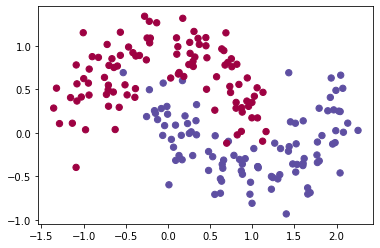

In [ ]:
np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise=0.20)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)
y = np.eye(2)[y]

In [ ]:
class Layer_Dense:
  def __init__(self, n_inputs, n_neurons):
    self.weights = 0.1 * np.random.randn(n_inputs, n_neurons)
    self.biases = np.zeros((1, n_neurons))

  def forward(self, inputs):
    self.output = np.dot(inputs, self.weights) + self.biases

  # def backward(self, dvalues, inputs):
  #     self.dweights = np.dot(inputs.T, dvalues)
  #     self.dbiases = np.sum(dvalues, axis=0, keepdims=True)
  #     self.dinputs = np.dot(dvalues, self.weights.T)
    
class Sigmoid:
  def forward(self, x):
    return 1 / (1 + np.exp(-x))

  def backward(self, x):
    return self.forward(x) * (1 - self.forward(x))

  
class Loss:
  def clip_shape(self, output, y):
    samples = len(output)
    output_clipped = np.clip(output, 1e-7, 1-1e-7)
    if len(y.shape) == 1:
        correct_confidences = output_clipped[range(samples), y]
    else:
        correct_confidences = np.sum(output_clipped*y, axis=1)
    return correct_confidences

  def forward(self, output, y):
    # negative_log_likelihoods = -np.log(correct_confidences)
    # data_loss = np.mean(negative_log_likelihoods)
    # return data_loss
   # output = self.clip_shape(output, y)
    return -np.mean(y * np.log(output) + (1 - y) * np.log(1 - output))

  def backward(self, output, y):
    #output = self.clip_shape(output, y)
    return -(y / output) + (1 - y) / (1 - output)




In [ ]:


layer1 = Layer_Dense(2,6)
layer1.forward(X)
#print(layer1.output)

activation1 = Sigmoid().forward(layer1.output)
#print(activation1)

layer2 = Layer_Dense(6,2)
layer2.forward(activation1)

activation2 = Sigmoid().forward(layer2.output)

# print(layer1.weights)
# print(layer2.weights)

# print(layer2.output)
# print(y)

layer2_loss = Loss().forward(activation2, y)
print('LOSS')
print(layer2_loss)

for i in range(50):
  dloss_da2 = Loss().backward(activation2, y)
  da2_dz2 = Sigmoid().backward(layer2.output)
  dz2_dw2= activation1
  dloss_da2 * da2_dz2
  dloss_dw2 = np.dot(dz2_dw2.T, dloss_da2 * da2_dz2)

  da2_da1 = layer2.weights
  da1_dz1 = Sigmoid().backward(layer1.output)
  dz1_dw1 = X
  dloss_da1 = np.dot(dloss_da2 * da2_dz2, da2_da1.T)
  dloss_dw1 = np.dot(dz1_dw1.T, (dloss_da1 * da1_dz1))

  lr = 0.01

  layer2.weights -= lr * dloss_dw2
  layer2.biases -= lr * np.mean(dloss_da2 * da2_dz2, axis=0, keepdims=True)
  layer1.weights -= lr * dloss_dw1
  layer1.biases -= lr * np.mean(dloss_da1 * da1_dz1, axis=0, keepdims=True)

  layer1.forward(X)
  activation1 = Sigmoid().forward(layer1.output)
  # layer2 = Layer_Dense(6,2)
  layer2.forward(activation1)

  activation2 = Sigmoid().forward(layer2.output)
  layer2_loss = Loss().forward(activation2, y)
  print('LOSS')
  print(layer2_loss)


LOSS
0.6912448465840774
LOSS
0.6902236555661281
LOSS
0.6887803617134495
LOSS
0.6866921887626595
LOSS
0.6836700050324314
LOSS
0.6793314455080295
LOSS
0.6731959454749894
LOSS
0.6647097164807577
LOSS
0.6533208893289216
LOSS
0.638614568167027
LOSS
0.6204828125463226
LOSS
0.5992580938265177
LOSS
0.575724715843791
LOSS
0.5509764799946091
LOSS
0.5261784954343318
LOSS
0.5023397203951745
LOSS
0.4801770914205787
LOSS
0.4600884213479124
LOSS
0.44220220511383745
LOSS
0.4264589852740974
LOSS
0.41269041469699985
LOSS
0.4006800010613323
LOSS
0.3902027338282232
LOSS
0.3810472431872576
LOSS
0.37302583208957657
LOSS
0.3659771199061555
LOSS
0.3597647429955241
LOSS
0.35427432335693626
LOSS
0.3494099812427368
LOSS
0.3450910416013646
LOSS
0.34124920286671206
LOSS
0.3378262259745792
LOSS
0.3347721000444984
LOSS
0.3320436037797812
LOSS
0.32960317786901483
LOSS
0.32741803465633795
LOSS
0.32545944657084047
LOSS
0.323702169222618
LOSS
0.32212396683727706
LOSS
0.3207052165816041
LOSS
0.31942857475682596
LOSS
0.31